In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [5]:
df = pd.read_csv('C:/Users/Naung Naung/OneDrive/Desktop/WAREM/Hiwi/Sorted_Data_Inn.csv')
df.head(10)

,Dataset,Temp_up20,Temp_low20,Ox_up20,Ox_low20,kf_up20,kf_low20,d10,dm,d84,Cu,Cc,Por,Fines
0,Dec_19,5.4,5.2,97.0,96.4,0.00592,0.00267,2.9,80.3,98.9,20.1,2.0,18.7,6.0
1,Dec_19,4.6,5.0,94.9,91.1,0.00727,0.00056,2.0,70.0,84.3,21.0,1.9,18.8,7.4
2,Dec_19,3.6,4.5,83.3,31.1,0.00295,0.00021,0.4,50.1,94.6,150.6,32.3,17.9,10.5
3,Dec_19,4.4,4.8,85.5,47.2,0.00561,0.00103,0.5,37.4,62.3,73.9,8.9,13.7,15.2
4,Dec_19,3.4,4.3,36.1,1.7,0.00222,0.00064,0.9,37.0,69.5,44.0,4.1,16.7,10.3
5,Mar_20,6.7,6.7,107.5,73.7,0.00061,0.00061,0.5,56.5,99.1,120.4,32.9,16.9,12.8
6,Mar_20,6.1,6.1,107.7,79.6,0.00481,0.00062,0.9,37.8,73.6,42.3,4.9,16.6,10.1
7,Mar_20,5.8,5.8,92.5,86.2,0.00142,0.00026,0.4,29.4,55.9,72.0,6.1,15.7,13.4
8,Mar_20,8.7,8.5,104.8,105.0,0.01212,0.00800,3.5,63.0,113.2,18.8,3.1,7.5,5.1
9,Mar_20,9.5,9.7,112.8,93.0,0.00432,0.00019,2.4,44.9,90.1,20.6,2.2,0.2,6.8


#### Basic statistics

In [6]:
df.iloc[:,1:].describe()

,Temp_up20,Temp_low20,Ox_up20,Ox_low20,kf_up20,kf_low20,d10,dm,d84,Cu,Cc,Por,Fines
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,6.516667,6.688889,91.122222,73.066667,0.004773,0.001341,1.533333,51.183333,89.138889,57.844444,7.338889,12.111111,9.677778
std,1.721918,1.534271,21.967370,32.545751,0.002904,0.001789,1.246171,15.187543,23.783438,39.008720,9.427628,5.308361,3.153440
min,3.400000,4.300000,36.100000,1.700000,0.000610,0.000190,0.400000,28.200000,55.900000,17.200000,1.900000,0.200000,4.400000
25%,5.500000,5.350000,84.675000,52.500000,0.002795,0.000572,0.500000,39.025000,71.575000,21.450000,2.400000,7.750000,6.950000
50%,6.950000,7.000000,95.950000,84.300000,0.004715,0.000745,0.900000,48.500000,88.500000,49.050000,4.200000,12.750000,10.400000
75%,7.275000,7.425000,106.825000,98.500000,0.006393,0.001427,2.375000,61.850000,101.425000,73.500000,5.800000,16.675000,12.050000
max,9.500000,9.700000,114.300000,106.500000,0.012120,0.008000,4.300000,80.300000,148.100000,150.600000,32.900000,18.800000,15.200000


#### Boxplots by output labels/classes

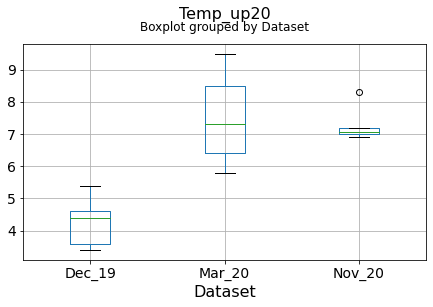

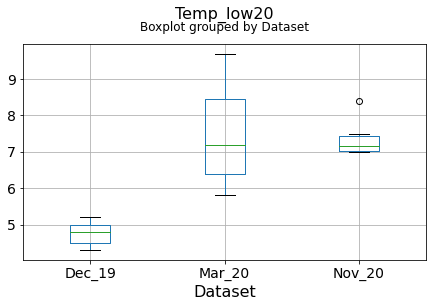

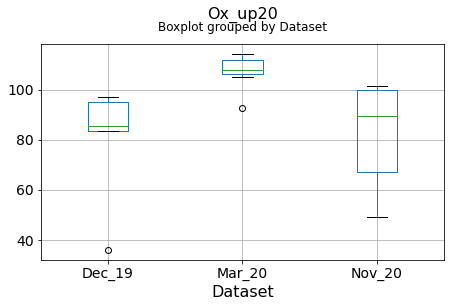

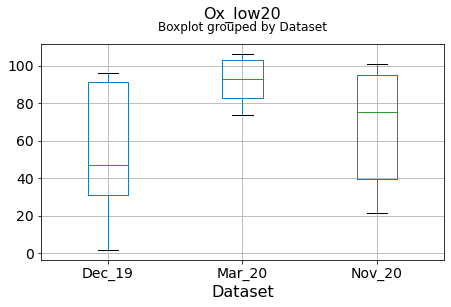

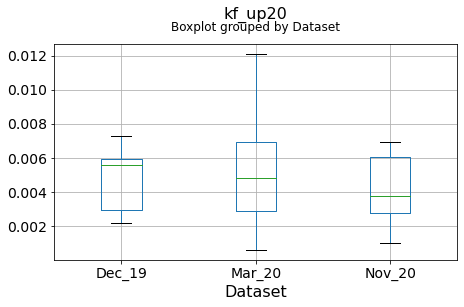

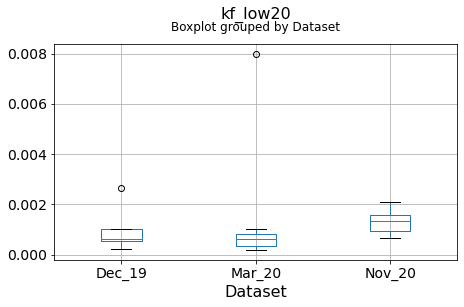

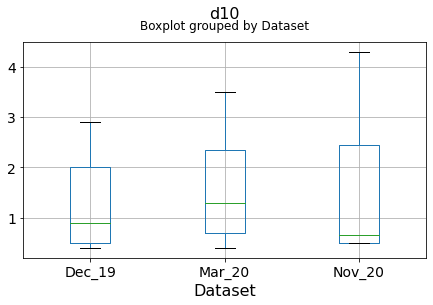

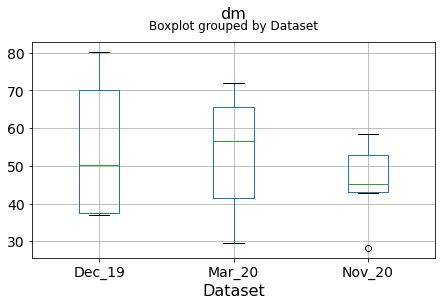

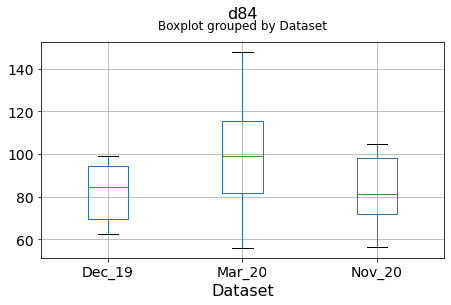

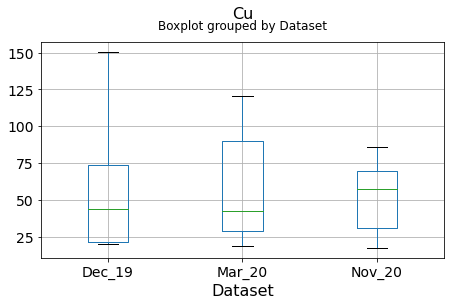

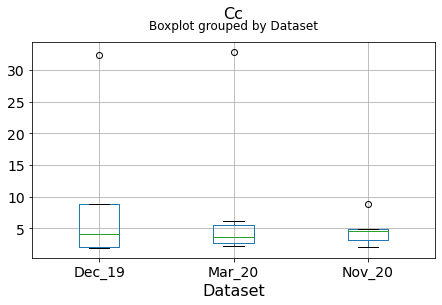

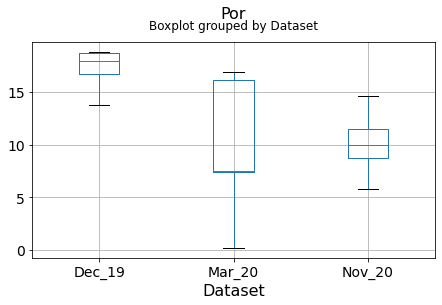

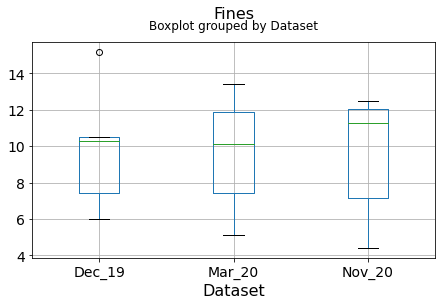

In [7]:
for c in df.columns[1:]:
    df.boxplot(c,by='Dataset',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Dataset", fontsize=16)

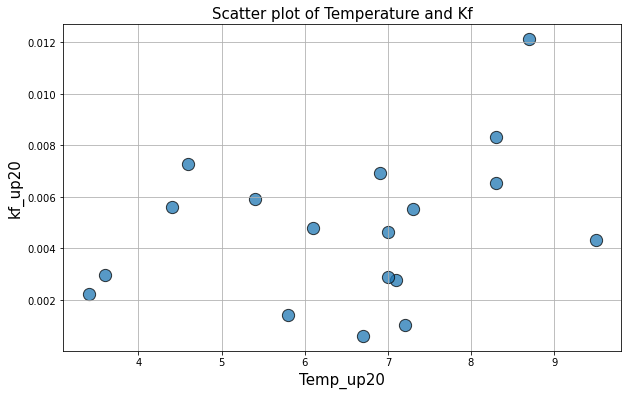

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['Temp_up20'],df['kf_up20'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of Temperature and Kf",fontsize=15)
plt.xlabel("Temp_up20",fontsize=15)
plt.ylabel("kf_up20",fontsize=15)
plt.show()

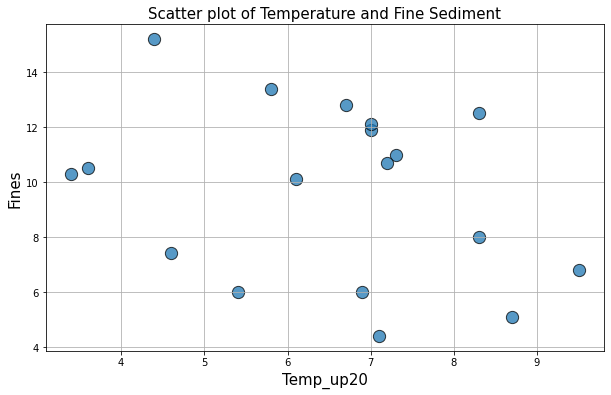

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['Temp_up20'],df['Fines'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of Temperature and Fine Sediment",fontsize=15)
plt.xlabel("Temp_up20",fontsize=15)
plt.ylabel("Fines",fontsize=15)
plt.show()

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

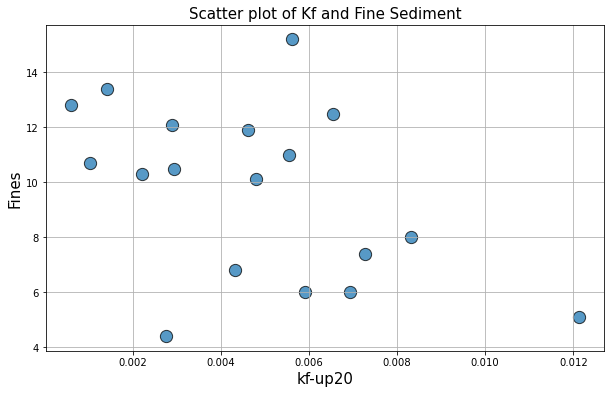

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df['kf_up20'],df['Fines'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of Kf and Fine Sediment",fontsize=15)
plt.xlabel("kf-up20",fontsize=15)
plt.ylabel("Fines",fontsize=15)
plt.show()

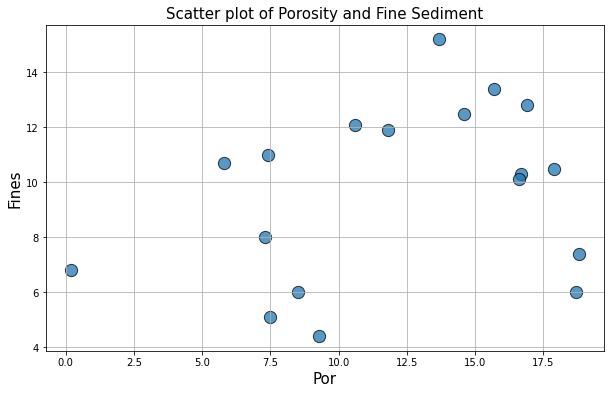

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df['Por'],df['Fines'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of Porosity and Fine Sediment",fontsize=15)
plt.xlabel("Por",fontsize=15)
plt.ylabel("Fines",fontsize=15)
plt.show()

C:\Users\NAUNGN~1\AppData\Local\Temp/ipykernel_1636/2618353917.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
C:\Users\NAUNGN~1\AppData\Local\Temp/ipykernel_1636/2618353917.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


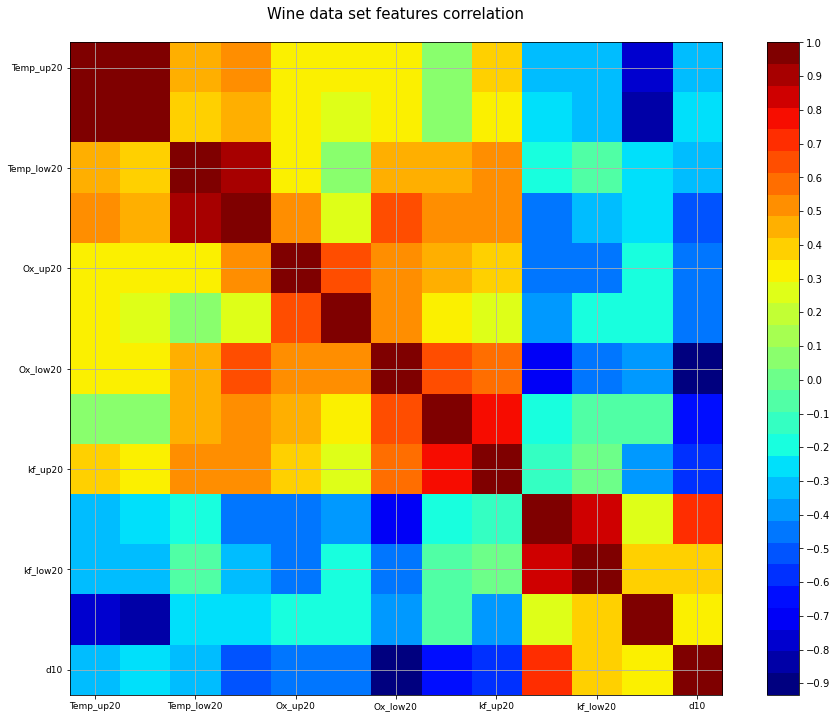

In [88]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [12]:
matrix = df.corr()
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
            Temp_up20  Temp_low20   Ox_up20  Ox_low20   kf_up20  kf_low20  \
Temp_up20    1.000000    0.987559  0.463645  0.528782  0.329088  0.327481   
Temp_low20   0.987559    1.000000  0.390973  0.434377  0.305155  0.281345   
Ox_up20      0.463645    0.390973  1.000000  0.896503  0.352825  0.092887   
Ox_low20     0.528782    0.434377  0.896503  1.000000  0.503878  0.253930   
kf_up20      0.329088    0.305155  0.352825  0.503878  1.000000  0.644024   
kf_low20     0.327481    0.281345  0.092887  0.253930  0.644024  1.000000   
d10          0.351713    0.303251  0.432417  0.624080  0.500854  0.519649   
dm           0.091986    0.033566  0.433842  0.527703  0.444231  0.298638   
d84          0.365681    0.348776  0.526429  0.512639  0.399521  0.265100   
Cu          -0.312206   -0.279917 -0.167183 -0.430444 -0.472696 -0.372807   
Cc          -0.330475   -0.298386 -0.042152 -0.350497 -0.423078 -0.214410   
Por         -0.771888   -0.809050 -0.251528 -0.2711

            Temp_up20  Temp_low20   Ox_up20   kf_up20  kf_low20       d10  \
Temp_up20    1.000000    0.987559  0.463645  0.329088  0.327481  0.351713   
Temp_low20   0.987559    1.000000  0.390973  0.305155  0.281345  0.303251   
Ox_up20      0.463645    0.390973  1.000000  0.352825  0.092887  0.432417   
kf_up20      0.329088    0.305155  0.352825  1.000000  0.644024  0.500854   
kf_low20     0.327481    0.281345  0.092887  0.644024  1.000000  0.519649   
d10          0.351713    0.303251  0.432417  0.500854  0.519649  1.000000   
dm           0.091986    0.033566  0.433842  0.444231  0.298638  0.614801   
d84          0.365681    0.348776  0.526429  0.399521  0.265100  0.594933   
Cu          -0.312206   -0.279917 -0.167183 -0.472696 -0.372807 -0.719941   
Cc          -0.330475   -0.298386 -0.042152 -0.423078 -0.214410 -0.462206   
Por         -0.771888   -0.809050 -0.251528 -0.186828 -0.165228 -0.373090   
Fines       -0.291122   -0.268261 -0.341880 -0.462963 -0.453327 -0.933858   

<AxesSubplot:>

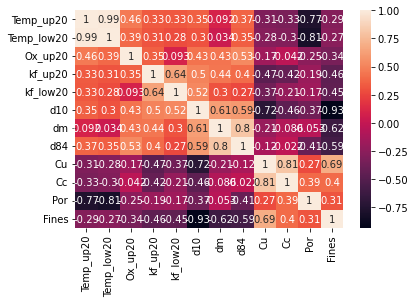

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
 
Dataset = pd.read_csv('C:/Users/Naung Naung/OneDrive/Desktop/WAREM/Hiwi/Sorted_Data_Inn.csv')

numeric_col = ['Temp_up20','Temp_low20','Ox_up20','kf_up20','kf_low20','d10','dm','d84','Cu','Cc','Por','Fines']
 
corr_matrix = Dataset.loc[:,numeric_col].corr()
print(corr_matrix)

sn.heatmap(corr_matrix, annot=True)

## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X = df.drop('Dataset',axis=1)
y = df['Dataset']

In [18]:
X = scaler.fit_transform(X)

In [19]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [20]:
dfx.head(10)

,Temp_up20,Temp_low20,Ox_up20,Ox_low20,kf_up20,kf_low20,d10,dm,d84,Cu,Cc,Por,Fines
0,-0.667303,-0.998555,0.275326,0.737725,0.406305,0.764663,1.128488,1.972722,0.422315,-0.995642,-0.582720,1.277214,-1.200087
1,-1.145371,-1.132689,0.176958,0.570156,0.884658,-0.448956,0.385337,1.274873,-0.209355,-0.971901,-0.593635,1.296598,-0.743256
2,-1.742955,-1.468025,-0.366407,-1.326850,-0.646072,-0.650267,-0.935819,-0.073398,0.236275,2.446752,2.724415,1.122139,0.268297
3,-1.264888,-1.266824,-0.263355,-0.817820,0.296461,-0.178624,-0.853247,-0.933853,-1.161186,0.423521,0.170390,0.307996,1.801943
4,-1.862472,-1.602159,-2.577341,-2.256383,-0.904737,-0.402942,-0.522958,-0.960954,-0.849677,-0.365196,-0.353513,0.889527,0.203036
5,0.109557,0.007452,0.767165,0.020024,-1.475218,-0.420197,-0.853247,0.360217,0.430968,1.650122,2.789903,0.928295,1.018805
6,-0.248994,-0.394951,0.776533,0.206563,0.012992,-0.414445,-0.522958,-0.906752,-0.672291,-0.410039,-0.266196,0.870142,0.137774
7,-0.428269,-0.596152,0.064538,0.415234,-1.188206,-0.621508,-0.935819,-1.475872,-1.438082,0.373402,-0.135220,0.695683,1.214590
8,1.304727,1.214660,0.640692,1.009629,2.603187,3.830343,1.623922,0.800607,1.041005,-1.029934,-0.462659,-0.893834,-1.493764
9,1.782794,2.019466,1.015426,0.630228,-0.160632,-0.661770,0.715626,-0.425711,0.041583,-0.982453,-0.560891,-2.308892,-0.939041


In [21]:
dfx.describe()

,Temp_up20,Temp_low20,Ox_up20,Ox_low20,kf_up20,kf_low20,d10,dm,d84,Cu,Cc,Por,Fines
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,5.242720e-17,-1.541976e-16,1.480297e-16,-2.713879e-16,3.700743e-17,-1.256711e-16,-8.635068e-17,-7.771561e-16,-5.265849e-16,-1.287550e-16,3.392348e-17,8.635068e-17,1.881211e-16
std,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.862472e+00,-1.602159e+00,-2.577341e+00,-2.256383e+00,-1.475218e+00,-6.617703e-01,-9.358192e-01,-1.557174e+00,-1.438082e+00,-1.072139e+00,-5.936351e-01,-2.308892e+00,-1.722179e+00
25%,-6.075444e-01,-8.979544e-01,-3.019996e-01,-6.502516e-01,-7.009942e-01,-4.417661e-01,-8.532469e-01,-8.237555e-01,-7.599024e-01,-9.600308e-01,-5.390619e-01,-8.453733e-01,-8.900947e-01
50%,2.589534e-01,2.086533e-01,2.261419e-01,3.551617e-01,-2.066959e-02,-3.425484e-01,-5.229578e-01,-1.818021e-01,-2.764156e-02,-2.319842e-01,-3.425984e-01,1.238445e-01,2.356666e-01
75%,4.531684e-01,4.936886e-01,7.355466e-01,8.041198e-01,5.737287e-01,5.000824e-02,6.949834e-01,7.226916e-01,5.315591e-01,4.129701e-01,-1.679642e-01,8.846805e-01,7.740742e-01
max,1.782794e+00,2.019466e+00,1.085689e+00,1.057054e+00,2.603187e+00,3.830343e+00,2.284500e+00,1.972722e+00,2.550955e+00,2.446752e+00,2.789903e+00,1.296598e+00,1.801943e+00


### PCA class import and analysis

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=None)

In [5]:
dfx_pca = pca.fit(dfx)

NameError: name 'dfx' is not defined

#### Plot the _explained variance ratio_

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

NameError: name 'plt' is not defined

**The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [26]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [27]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.644261,2.927007,-0.566039,-0.345756,-0.019686,-0.079045,0.869683,-0.103830,-0.110875,0.196858,0.109289,-0.097408,0.030026
1,0.483196,2.503580,-0.783721,-1.100418,-0.348269,0.579892,0.187826,0.528124,-0.293246,0.282163,0.092580,0.090612,-0.054378
2,-3.630982,1.747255,2.149087,1.164869,0.403940,-0.430833,-0.863162,0.337542,-0.289068,-0.236847,0.208109,-0.036508,-0.027005
3,-2.655705,0.152385,-0.599902,-0.074331,-1.091261,0.630771,-0.829067,-0.630707,0.121190,0.550471,-0.335131,-0.127282,0.003378
4,-3.438697,1.042096,-2.557178,0.526226,1.336317,0.224443,-0.130375,0.081279,0.368031,-0.178288,-0.015326,0.071042,-0.036823
5,-1.982820,0.153476,3.231765,0.364774,-0.166946,-1.079672,0.627598,0.184055,0.323628,0.321789,-0.189221,0.073954,0.011875
6,-0.679362,0.053717,-0.372274,-1.206983,-0.972291,-0.295674,-0.244825,0.267292,0.394729,-0.140837,0.404973,-0.168318,0.080123
7,-2.336690,-0.740984,-0.259550,-1.427735,-0.889041,-0.513895,0.169861,-0.636939,0.031715,-0.307451,-0.048763,0.224823,-0.001709
8,4.914005,0.359631,-0.834324,2.571271,-1.593458,-0.584876,-0.242080,-0.402061,0.070404,-0.007971,0.150022,0.095345,-0.012808
9,2.710523,-2.714768,0.133382,-0.873301,0.958540,-0.502326,-0.476524,0.387635,-0.289250,0.419829,0.171965,0.005513,-0.030897


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[1],dfx_trans[2],c=df['Temp_up20'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

NameError: name 'plt' is not defined

In [35]:
df = pd.read_csv('C:/Users/Naung Naung/OneDrive/Desktop/WAREM/Hiwi/Sorted_Data_Inn.csv')
df.head(10)

,Dataset,Temp_up20,Temp_low20,Ox_up20,Ox_low20,kf_up20,kf_low20,d10,dm,d84,Cu,Cc,Por,Fines
0,Dec_19,5.4,5.2,97.0,96.4,0.00592,0.00267,2.9,80.3,98.9,20.1,2.0,18.7,6.0
1,Dec_19,4.6,5.0,94.9,91.1,0.00727,0.00056,2.0,70.0,84.3,21.0,1.9,18.8,7.4
2,Dec_19,3.6,4.5,83.3,31.1,0.00295,0.00021,0.4,50.1,94.6,150.6,32.3,17.9,10.5
3,Dec_19,4.4,4.8,85.5,47.2,0.00561,0.00103,0.5,37.4,62.3,73.9,8.9,13.7,15.2
4,Dec_19,3.4,4.3,36.1,1.7,0.00222,0.00064,0.9,37.0,69.5,44.0,4.1,16.7,10.3
5,Mar_20,6.7,6.7,107.5,73.7,0.00061,0.00061,0.5,56.5,99.1,120.4,32.9,16.9,12.8
6,Mar_20,6.1,6.1,107.7,79.6,0.00481,0.00062,0.9,37.8,73.6,42.3,4.9,16.6,10.1
7,Mar_20,5.8,5.8,92.5,86.2,0.00142,0.00026,0.4,29.4,55.9,72.0,6.1,15.7,13.4
8,Mar_20,8.7,8.5,104.8,105.0,0.01212,0.00800,3.5,63.0,113.2,18.8,3.1,7.5,5.1
9,Mar_20,9.5,9.7,112.8,93.0,0.00432,0.00019,2.4,44.9,90.1,20.6,2.2,0.2,6.8


In [65]:
from sklearn.preprocessing import StandardScaler
inndata = ['Temp_up20','Temp_low20','Ox_up20','kf_up20','kf_low20','d10','dm','d84','Cu','Cc','Por','Fines']
# Separating out the features
x = df.loc[:, inndata].values
# Separating out the target
y = df.loc[:,['Dataset']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-0.66730287 -0.99855515  0.27532578  0.40630501  0.76466269  1.12848786
   1.97272214  0.42231491 -0.99564181 -0.58272044  1.27721366 -1.20008697]
 [-1.1453706  -1.13268943  0.17695797  0.88465828 -0.44895574  0.38533732
   1.27487309 -0.20935474 -0.97190116 -0.59363508  1.29659801 -0.74325628]
 [-1.74295527 -1.46802511 -0.36640709 -0.64607221 -0.65026685 -0.9358192
  -0.07339836  0.23627522  2.44675238  2.72441513  1.12213881  0.26829739]
 [-1.26488754 -1.2668237  -0.2633551   0.29646092 -0.17862367 -0.85324692
  -0.93385301 -1.16118573  0.42352146  0.17038964  0.30799587  1.80194328]
 [-1.8624722  -1.60215939 -2.57734079 -0.90473731 -0.40294177 -0.52295779
  -0.96095394 -0.8496774  -0.36519567 -0.35351302  0.88952655  0.20303586]
 [ 0.10955719  0.0074519   0.76716485 -1.47521789 -0.42019701 -0.85324692
   0.36021658  0.43096792  1.65012169  2.78990296  0.92829526  1.01880495]
 [-0.24899361 -0.39495092  0.77653321  0.01299231 -0.41444526 -0.52295779
  -0.90675208 -0.67229072 -0.4100

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [63]:
finalDf = pd.concat([principalDf, df[['Dataset']]], axis = 1)

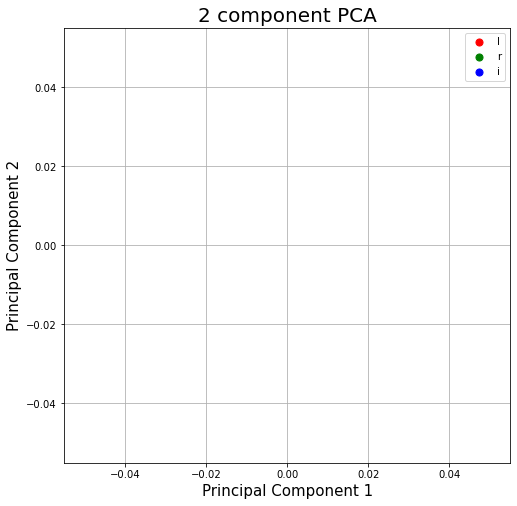

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Dataset = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for Dataset, color in zip(Dataset,colors):
    indicesToKeep = finalDf['Dataset'] == Dataset
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Dataset)
ax.grid()